#                              Learn Handwritten Digits using Probability Program
###                       BM2033: Probability and Random Variables
Anirudh Srinivasan (CS20BTECH11059)

In [1]:
# Importing all the required libraries
import cv2
import numpy
import sys
numpy.set_printoptions(threshold=sys.maxsize) 
import matplotlib.pyplot as plt

In [2]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Global Variables

1.   n is the dimensions in n x n pixel matrix
2.   threshold is the value of the pixel below which it will be considered as 1 in the binary image array






In [3]:
# Global Variables
n = 4
threshold = 200

# Functions
## I. train_bin_arr
This function returns the binary marking arrays of the images
1. The image is converted RGB to grayscale. This instead of a triplet of [0,255], it's a scale from [0,255] with higher values moving towards white
2. The threshold value is used to decide if a pixel is marked or not marked
3. numbers are the number of training samples and their nomenclature is done in such a way that they are numbers (inside respective folders for zero and one)


In [4]:
# Function to return the binary arrays
def train_bin_arr(path, ext, numbers):
  """
    Input: The path, extension of the training images along with the number of training samples. 
           Note that: The training samples have to be named as increasing natural numbers for this code to work
    Output: It returns the binary marked arrays for the training samples for the handwritten digits
  """
  bin_arr = [] # bin_arr stores binary arrays of zeroes or ones
  for i in range(0, len(numbers)-1): 
    img = cv2.imread(path + numbers[i] + ext) # Reads image from disc
    res = cv2.resize(img, (n, n), interpolation = cv2.INTER_CUBIC) # Resize image to desired n*n size, here n = 4
    gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY) # Converts image to grayscale from RGB
    arr=[] 
    rows, cols = n, n 
    for i in range(rows): 
      col = [] 
      for j in range(cols): 
        if(gray[i][j] < threshold): 
          col.append(1) 
        else: 
          col.append(0) 
      arr.append(col) 
  bin_arr.append(arr)
  return bin_arr

# Training Data
Trying to store the binary arrays of pixel marked for zeroes and ones in the training samples. These pixel values will be compared with the binary pixel marked array of the testing data and based on the similarity, the predicted value will be returned.

In [5]:
# Training Data

numbers = ['1','2','3','4','5','6','7','8','9','10','11'] 

bin_zeroes = train_bin_arr("/content/gdrive/MyDrive/BM2033 - Learn Handwritten Digits using Probability/Training Data/Zero/", ".jpg", numbers)
bin_ones = train_bin_arr("/content/gdrive/MyDrive/BM2033 - Learn Handwritten Digits using Probability/Training Data/One/", ".jpg", numbers)

## II. p_given_x
1. P_given_X will store probabilty of i'th pixel begin marked for given image of a handwritten 'x'. 
2. The function converts a 2-D binary matrix to 1-D array.

In [6]:
def p_given_x(P_given_x, bin_arr):
  """
    Input: P_given_x array to store the probability of ith pixel being 1 given that number is x
           bin_arr to pass either bin_zeroes or bin_ones from the training binary matrices
    
    Output: Returns the 2-D Binary Matrix to an 1-D Array
  """
  for arr in bin_arr: 
    rows, cols = n, n 
    for i in range(0, n-1): 
      for j in range(0, n-1): 
        P_given_x[(i)*n + j] = P_given_x[(i)*n + j] + arr[i][j]
  return P_given_x

## Calculating P_given_x for x = {0, 1}

In [7]:
P_given_0 = [0]*(n*n) # Stores probabiltiy of ith pixel being one given that number is zero
P_given_0 = p_given_x(P_given_0, bin_zeroes)
print(P_given_0)

P_given_1 = [0]*(n*n) # Stores probabiltiy of ith pixel being one given that number is one
P_given_1 = p_given_x(P_given_1, bin_ones)
print(P_given_1)

[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]


## III. prob_pix_marked
1. This function normalizes the P_given_num array to get probabilties in range of 0 to 1. 
2. This also plots the probabilty of pixel being marked for n x n pixels
3. This also trims down the probabilities below 0.01 to 0 to reduce noise

In [8]:
def prob_pix_marked(P_given_num):
  """
    Input: Conditional probability: P_given_num where num = {0, 1}
    
    Output: Plots the probability of pixel being marked 1 for n x n pixels
  """
  P_given_num = P_given_num/ numpy.sum(P_given_num)
  for i in (0, len(P_given_num)-1): 
    if(P_given_num[i] < 0.01): 
      P_given_num[i] = 0
  x = numpy.arange(0, n*n) 
  plt.xlabel("Pixel number") 
  plt.ylabel("Probability of pixel begin marked") 
  plt.plot(x, P_given_num, color = "blue") 
  plt.show()

## Plotting prob_pix_marked for num = {0, 1}

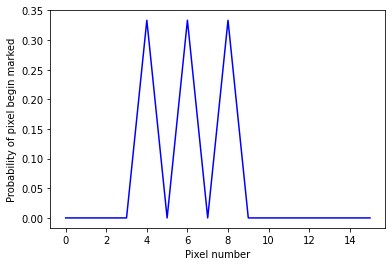

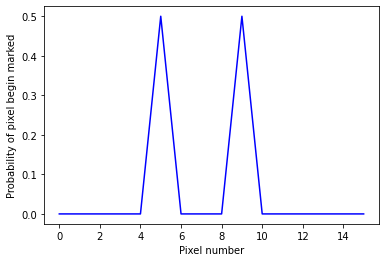

In [9]:
# Probability of pixels being marked
prob_pix_marked(P_given_0)
prob_pix_marked(P_given_1)

## IV. pixel_match
1. This function checks if the pixel being marked in test_arr image was expected there based on conditional probabilities (P_given_num) arrays we have already. 
2. It returns the percentage of matched pixels.
3. If the percentage of pixel pattern matched with array of P_given_num, validates that given image is probably 'num'.

In [10]:
def pixel_match(test_arr, P_given_num):
  """
    Input: Given a test array and conditional probability arrays for {0, 1}
    Output: It returns the percentage match of pixels for the test array wrt the existing arrays
  """
  matched = 0 
  for i in range(0, n**2 - 1): 
    if(test_arr[i] * P_given_num[i] > 0): 
      matched = matched + 1 
  #print("Matched = {}".format(matched))
  return (matched*100/(n**2))

## V. predictor
1. This function checks the pixel_match values and based on the percentage, prints whether the given digit is zero or one
2. If the decision is inconclusive (equal pixel match values), then it returns it can be either 0 or 1

In [11]:
def predictor(test_arr):
  """
    Input: Given a test array
    Output: Predicts whether the binary pixel matrix is of 0 or 1
  """

  res_arr = []
  if pixel_match(test_arr, P_given_0) > pixel_match(test_arr, P_given_1):
    print("The digit is 0")
  elif pixel_match(test_arr, P_given_0) < pixel_match(test_arr, P_given_1):
    print("The digit is 1")
  else:
    print("The digit can be either 0 or 1") 

## VI. test_arr
1. img, res and gray are processing variables and storing grayscale n x n size images in gray. 
2. Test_arr stores the binary pixel matrix (Flattend in n x n array rather than a n x n 2-D matrix)

In [12]:
def test_arr(path, ext):
    """
      Input: Given path and extension type of the test image
      Output: Returns the binary pixel matrix for the given image
    """
    img = cv2.imread(path + "1" + ext)
    res = cv2.resize(img, (n, n), interpolation = cv2.INTER_CUBIC) 
    gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY) 
    test_arr = [] 
    rows, cols = n, n 
    for i in range(rows): 
      for j in range(cols): 
        if(gray[i][j] < threshold): 
          test_arr.append(1) 
        else: 
          test_arr.append(0)
    return test_arr

# Testing Data
1. Read test digts
2. Compare their binary pixel matrix with the probabiltiy matrices
3. Predict whether the given digit is 0 or 1

In [13]:
# Reading the Test Data

test_zero_arr = test_arr("/content/gdrive/MyDrive/BM2033 - Learn Handwritten Digits using Probability/Test Data/Zeroes/", ".jpeg")
test_one_arr = test_arr("/content/gdrive/MyDrive/BM2033 - Learn Handwritten Digits using Probability/Test Data/Ones/", ".jpeg")
print(test_zero_arr)
print(test_one_arr)

[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]


# Predicting the Handwritten Digit from the Test Data

In [14]:
print("Testing Digit 0 from Test Data")
print("Pixel Match percentage with 0: {}".format(pixel_match(test_zero_arr, P_given_0)))
print("Pixel Match percentage with 1: {}".format(pixel_match(test_zero_arr, P_given_1)))
predictor(test_zero_arr)

print("\nTesting Digit 1 from Test Data")
print("Pixel Match percentage with 0: {}".format(pixel_match(test_one_arr, P_given_0)))
print("Pixel Match percentage with 1: {}".format(pixel_match(test_one_arr, P_given_1)))
predictor(test_one_arr)

Testing Digit 0 from Test Data
Pixel Match percentage with 0: 6.25
Pixel Match percentage with 1: 0.0
The digit is 0

Testing Digit 1 from Test Data
Pixel Match percentage with 0: 0.0
Pixel Match percentage with 1: 6.25
The digit is 1
